In [1]:
import pandas as pd
from tqdm import tqdm_notebook

from src.calculators import calculate_marginal_tax, calculate_inflation

%matplotlib inline

In [19]:
def calculate(income):
    results = []
    for year in tqdm_notebook(df['year'].unique()):
        dff = df[df['year'] == year]
        marginal_tax_brackets = dff[['rate','min_range']].values.tolist()

        total = calculate_marginal_tax(income, marginal_tax_brackets)

        income_adj = calculate_inflation('01/01/{}'.format(year), current_year, income)
        total_adj = calculate_marginal_tax(income_adj, marginal_tax_brackets)

        results.append([year, total, income_adj, total_adj])

    columns = ['year','total_tax','income_adjusted','total_tax_adjusted']
    results_df = pd.DataFrame(results, columns=columns)

    return results_df.set_index('year')

In [20]:
df = pd.read_csv('data/processed/data.csv')
df = df[df['status'] == 'single']

current_year = '01/01/2019'
incomes = [25000, 50000, 100000, 250000, 1000000]

dfs = []
for income in tqdm_notebook(incomes):
    dfs.append([income, calculate(income)])

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, max=101), HTML(value='')))

HBox(children=(IntProgress(value=0, max=101), HTML(value='')))

HBox(children=(IntProgress(value=0, max=101), HTML(value='')))

HBox(children=(IntProgress(value=0, max=101), HTML(value='')))

HBox(children=(IntProgress(value=0, max=101), HTML(value='')))

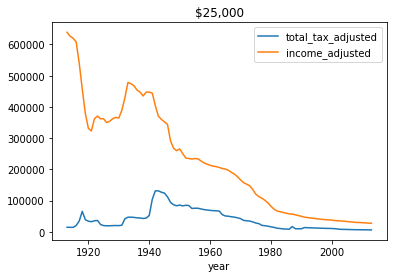

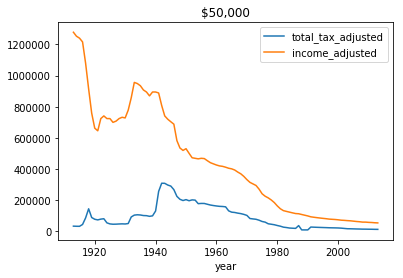

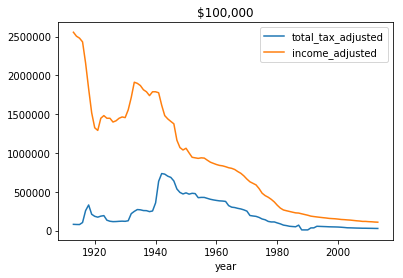

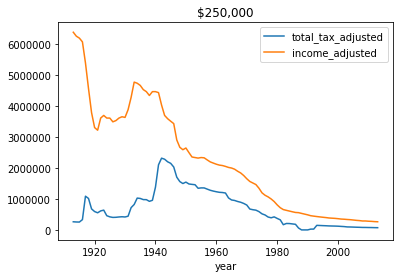

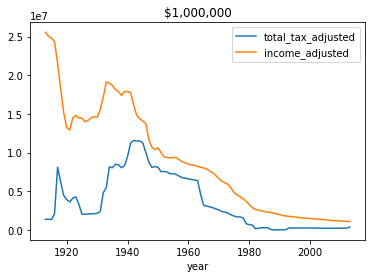

In [29]:
for income, dff in dfs:
    dff[['total_tax_adjusted','income_adjusted']].plot(kind='line', title='${:,.0f}'.format(income))

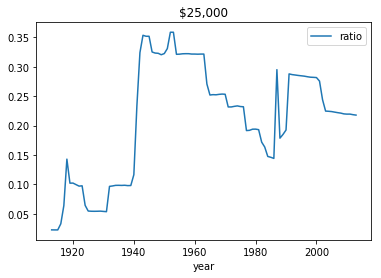

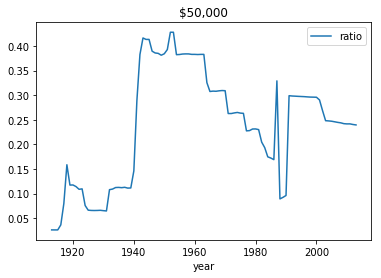

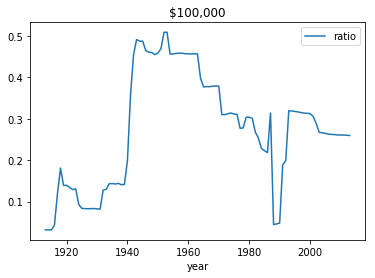

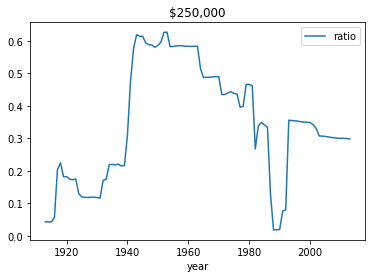

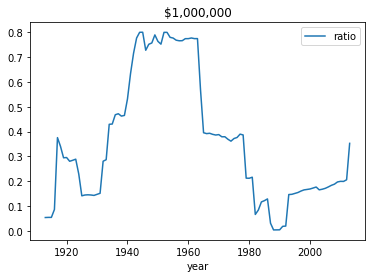

In [30]:
for income, dff in dfs:
    dff['ratio'] = dff['total_tax_adjusted'] / dff['income_adjusted']
    dff[['ratio']].plot(kind='line', title='${:,.0f}'.format(income))

In [3]:
inc_stats_df = pd.read_excel('data/processed/income_statistics.xlsx')
inc_stats_df.dtypes

year             int64
bracket        float64
filer_count      int64
dtype: object

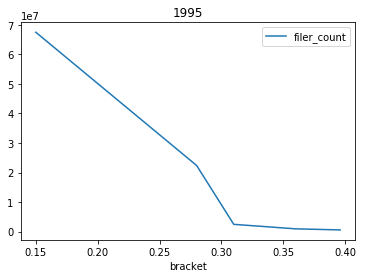

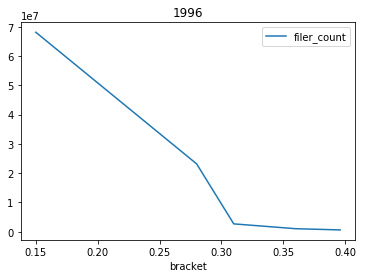

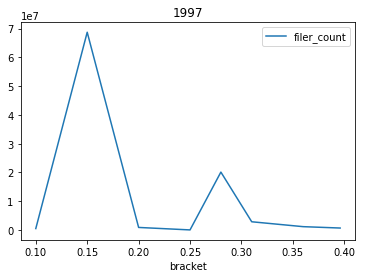

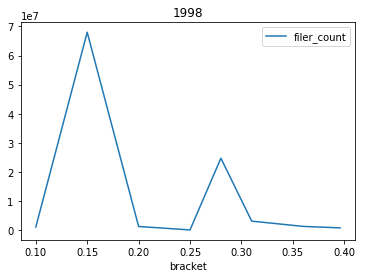

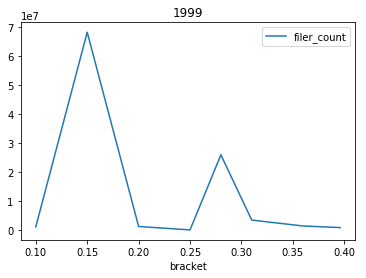

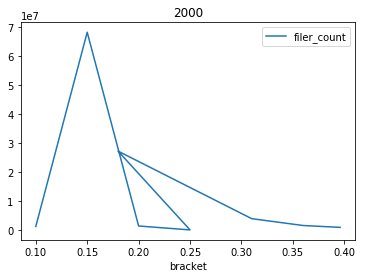

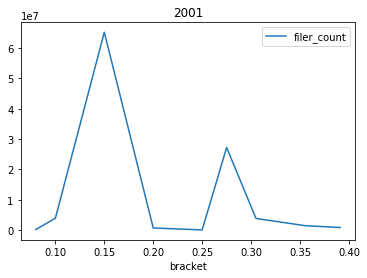

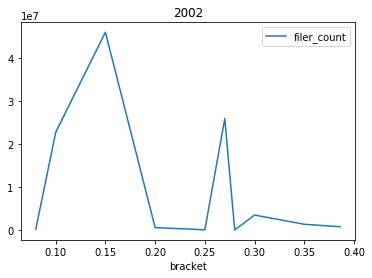

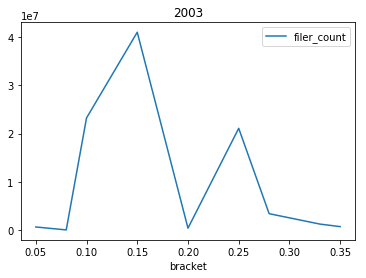

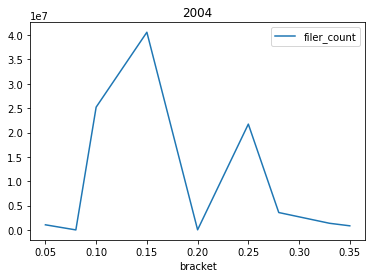

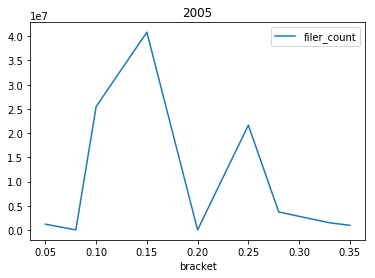

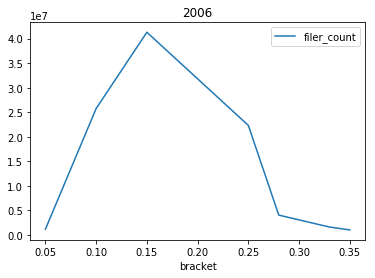

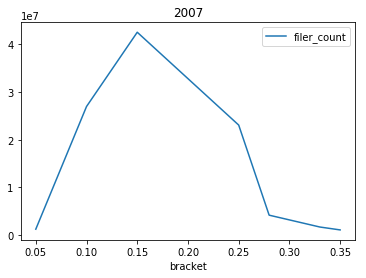

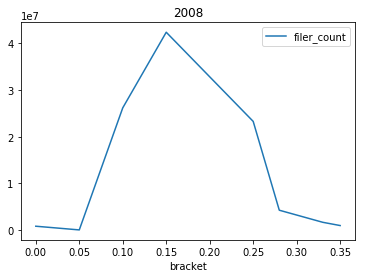

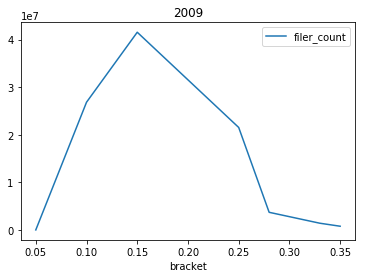

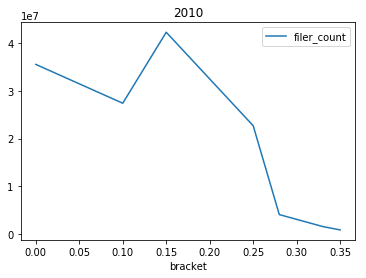

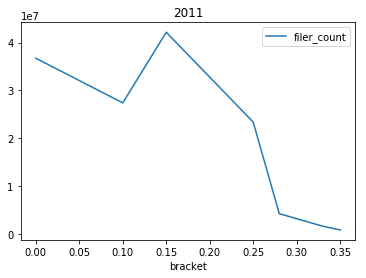

In [6]:
for year, dff in inc_stats_df.groupby('year'):
    dff = dff.set_index('bracket')
    dff[['filer_count']].plot(title=year)